In [163]:
# Import necessary libraries
import os
from datetime import datetime 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [164]:
for dirname, _, filenames in os.walk('condition'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

print()

for dirname, _, filenames in os.walk('control'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

condition\condition_1.csv
condition\condition_10.csv
condition\condition_11.csv
condition\condition_12.csv
condition\condition_13.csv
condition\condition_14.csv
condition\condition_15.csv
condition\condition_16.csv
condition\condition_17.csv
condition\condition_18.csv
condition\condition_19.csv
condition\condition_2.csv
condition\condition_20.csv
condition\condition_21.csv
condition\condition_22.csv
condition\condition_23.csv
condition\condition_3.csv
condition\condition_4.csv
condition\condition_5.csv
condition\condition_6.csv
condition\condition_7.csv
condition\condition_8.csv
condition\condition_9.csv

control\control_1.csv
control\control_10.csv
control\control_11.csv
control\control_12.csv
control\control_13.csv
control\control_14.csv
control\control_15.csv
control\control_16.csv
control\control_17.csv
control\control_18.csv
control\control_19.csv
control\control_2.csv
control\control_20.csv
control\control_21.csv
control\control_22.csv
control\control_23.csv
control\control_24.cs

# Data Analysis of Scores.csv

In [165]:
df_scores = pd.read_csv('scores.csv')
print(df_scores)

df_scores['DeltaMADRS'] = df_scores['madrs2'] - df_scores['madrs1']

print()

df_scores = df_scores.drop(columns='number')
print(df_scores)

          number  days  gender    age  afftype  melanch  inpatient    edu  \
0    condition_1    11       2  35-39      2.0      2.0        2.0   6-10   
1    condition_2    18       2  40-44      1.0      2.0        2.0   6-10   
2    condition_3    13       1  45-49      2.0      2.0        2.0   6-10   
3    condition_4    13       2  25-29      2.0      2.0        2.0  11-15   
4    condition_5    13       2  50-54      2.0      2.0        2.0  11-15   
5    condition_6     7       1  35-39      2.0      2.0        2.0   6-10   
6    condition_7    11       1  20-24      1.0      NaN        2.0  11-15   
7    condition_8     5       2  25-29      2.0      NaN        2.0  11-15   
8    condition_9    13       2  45-49      1.0      NaN        2.0   6-10   
9   condition_10     9       2  45-49      2.0      2.0        2.0   6-10   
10  condition_11    14       1  45-49      2.0      2.0        2.0   6-10   
11  condition_12    12       2  40-44      1.0      2.0        2.0   6-10   

In [166]:
print('Null Values Before: \n', df_scores.isnull().sum(), '\n')
print('Duplicates values Before:\n', df_scores.duplicated().sum())

Null Values Before: 
 days           0
gender         0
age            0
afftype       32
melanch       35
inpatient     32
edu            2
marriage      32
work          32
madrs1        32
madrs2        32
DeltaMADRS    32
dtype: int64 

Duplicates values Before:
 9


In [167]:
df_scores = df_scores.dropna()
print('Null Values After: \n', df_scores.isnull().sum(), '\n')

df_scores = df_scores.drop_duplicates()
print('Duplicates values After:\n', df_scores.duplicated().sum())

print(df_scores.info())
print()
print(df_scores.describe())

Null Values After: 
 days          0
gender        0
age           0
afftype       0
melanch       0
inpatient     0
edu           0
marriage      0
work          0
madrs1        0
madrs2        0
DeltaMADRS    0
dtype: int64 

Duplicates values After:
 0
<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 0 to 22
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   days        20 non-null     int64  
 1   gender      20 non-null     int64  
 2   age         20 non-null     object 
 3   afftype     20 non-null     float64
 4   melanch     20 non-null     float64
 5   inpatient   20 non-null     float64
 6   edu         20 non-null     object 
 7   marriage    20 non-null     float64
 8   work        20 non-null     float64
 9   madrs1      20 non-null     float64
 10  madrs2      20 non-null     float64
 11  DeltaMADRS  20 non-null     float64
dtypes: float64(8), int64(2), object(2)
memory usage: 2.0+ KB
None

    

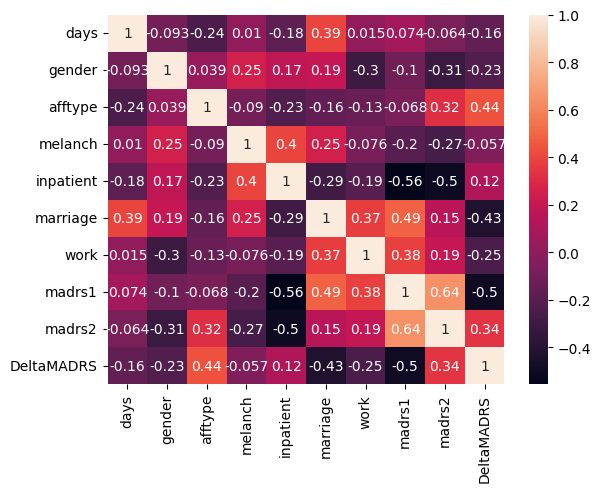

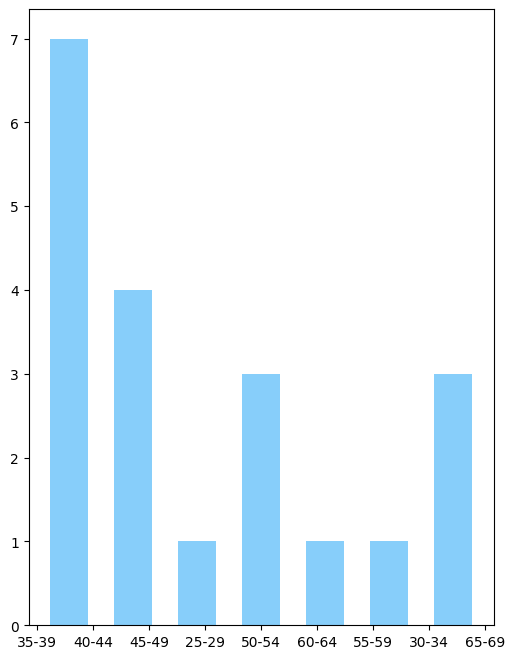

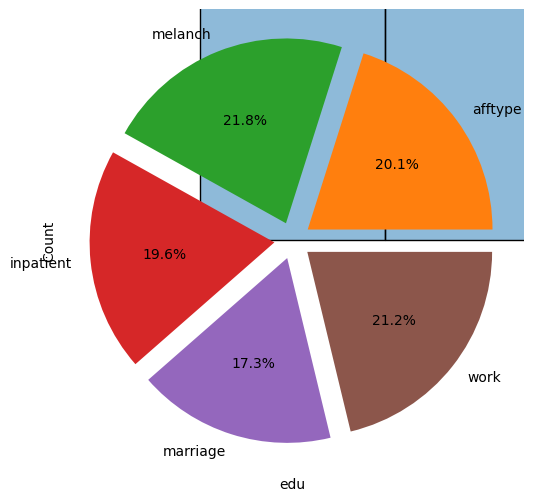

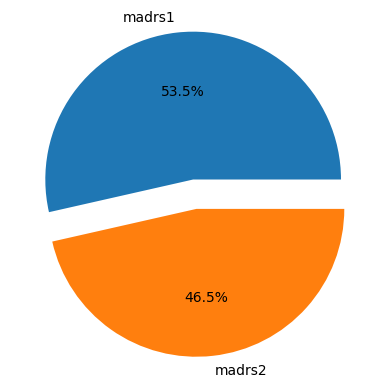

In [168]:
sns.heatmap(df_scores.corr(numeric_only=True), annot=True)

plt.figure(figsize=(6,8))
plt.hist(df_scores.age, bins=7, color='lightskyblue', rwidth=0.6)
plt.show

plt.figure(figsize=(10, 6))
sns.histplot(df_scores['edu'], kde=True)



afftype=df_scores.afftype.sum()
melanch=df_scores.melanch.sum()
inpatient=df_scores.inpatient.sum()
marriage=df_scores.marriage.sum()
work=df_scores.work.sum()

minutes=[afftype,melanch,inpatient,marriage,work]
labels=['afftype','melanch','inpatient','marriage','work']
        
plt.pie(minutes, labels=labels, autopct='%1.1f%%', explode=[0.1,0.1,0.1,0.1,0.1])        
plt.show()

madrs1=df_scores.madrs1.sum()
madrs2=df_scores.madrs2.sum()

minutes=[madrs1,madrs2]
labels=['madrs1','madrs2']

plt.pie(minutes,labels=labels,autopct='%1.1f%%',explode=[0.1,0.1])
plt.show()

# Time Series Analysis

In [169]:
def combine_data(path):
    dirs = os.listdir(path)
    combine_df = []
    
    for filepath in dirs:
        source = filepath.split('.')[0]
        if filepath.endswith('.csv'):
            X = pd.read_csv(path + filepath, parse_dates=['timestamp'], index_col='timestamp')
            X['source'] = source
            combine_df.append(X)
        
    return combine_df

combine_df = combine_data('condition/')

conditions = []
for condition in combine_df:
    condition_df = pd.DataFrame(columns=['mean_activity', 'std_activity', 'zero_activity_proportion', 'source'])
    condition_df['mean_activity'] = condition.activity.resample('H').mean()
    condition_df['std_activity'] = condition.activity.resample('H').std()
    condition_df['zero_activity_proportion'] = [data[1].tolist().count(0) for data in condition.activity.resample('H')]
    condition_df['source'] = condition.source
    conditions.append(condition_df)

combine_df = combine_data('control/')

controls = []
for control in combine_df:
    control_df = pd.DataFrame(columns=['mean_activity', 'std_activity', 'zero_activity_proportion', 'source'])
    control_df['mean_activity'] = control.activity.resample('H').mean()
    control_df['std_activity'] = control.activity.resample('H').std()
    control_df['zero_activity_proportion'] = [data[1].tolist().count(0) for data in control.activity.resample('H')]
    control_df['source'] = control.source
    controls.append(control_df)

C:\Users\nothi\AppData\Local\Temp\ipykernel_11068\651528136.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  condition_df['mean_activity'] = condition.activity.resample('H').mean()
C:\Users\nothi\AppData\Local\Temp\ipykernel_11068\651528136.py:20: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  condition_df['std_activity'] = condition.activity.resample('H').std()
C:\Users\nothi\AppData\Local\Temp\ipykernel_11068\651528136.py:21: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  condition_df['zero_activity_proportion'] = [data[1].tolist().count(0) for data in condition.activity.resample('H')]
C:\Users\nothi\AppData\Local\Temp\ipykernel_11068\651528136.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  condition_df['mean_activity'] = condition.activity.resample('H').mean()
C:

C:\Users\nothi\AppData\Local\Temp\ipykernel_11068\87801790.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[i].set_title(f'Mean activity for {condition.source[1]}', fontsize=18)


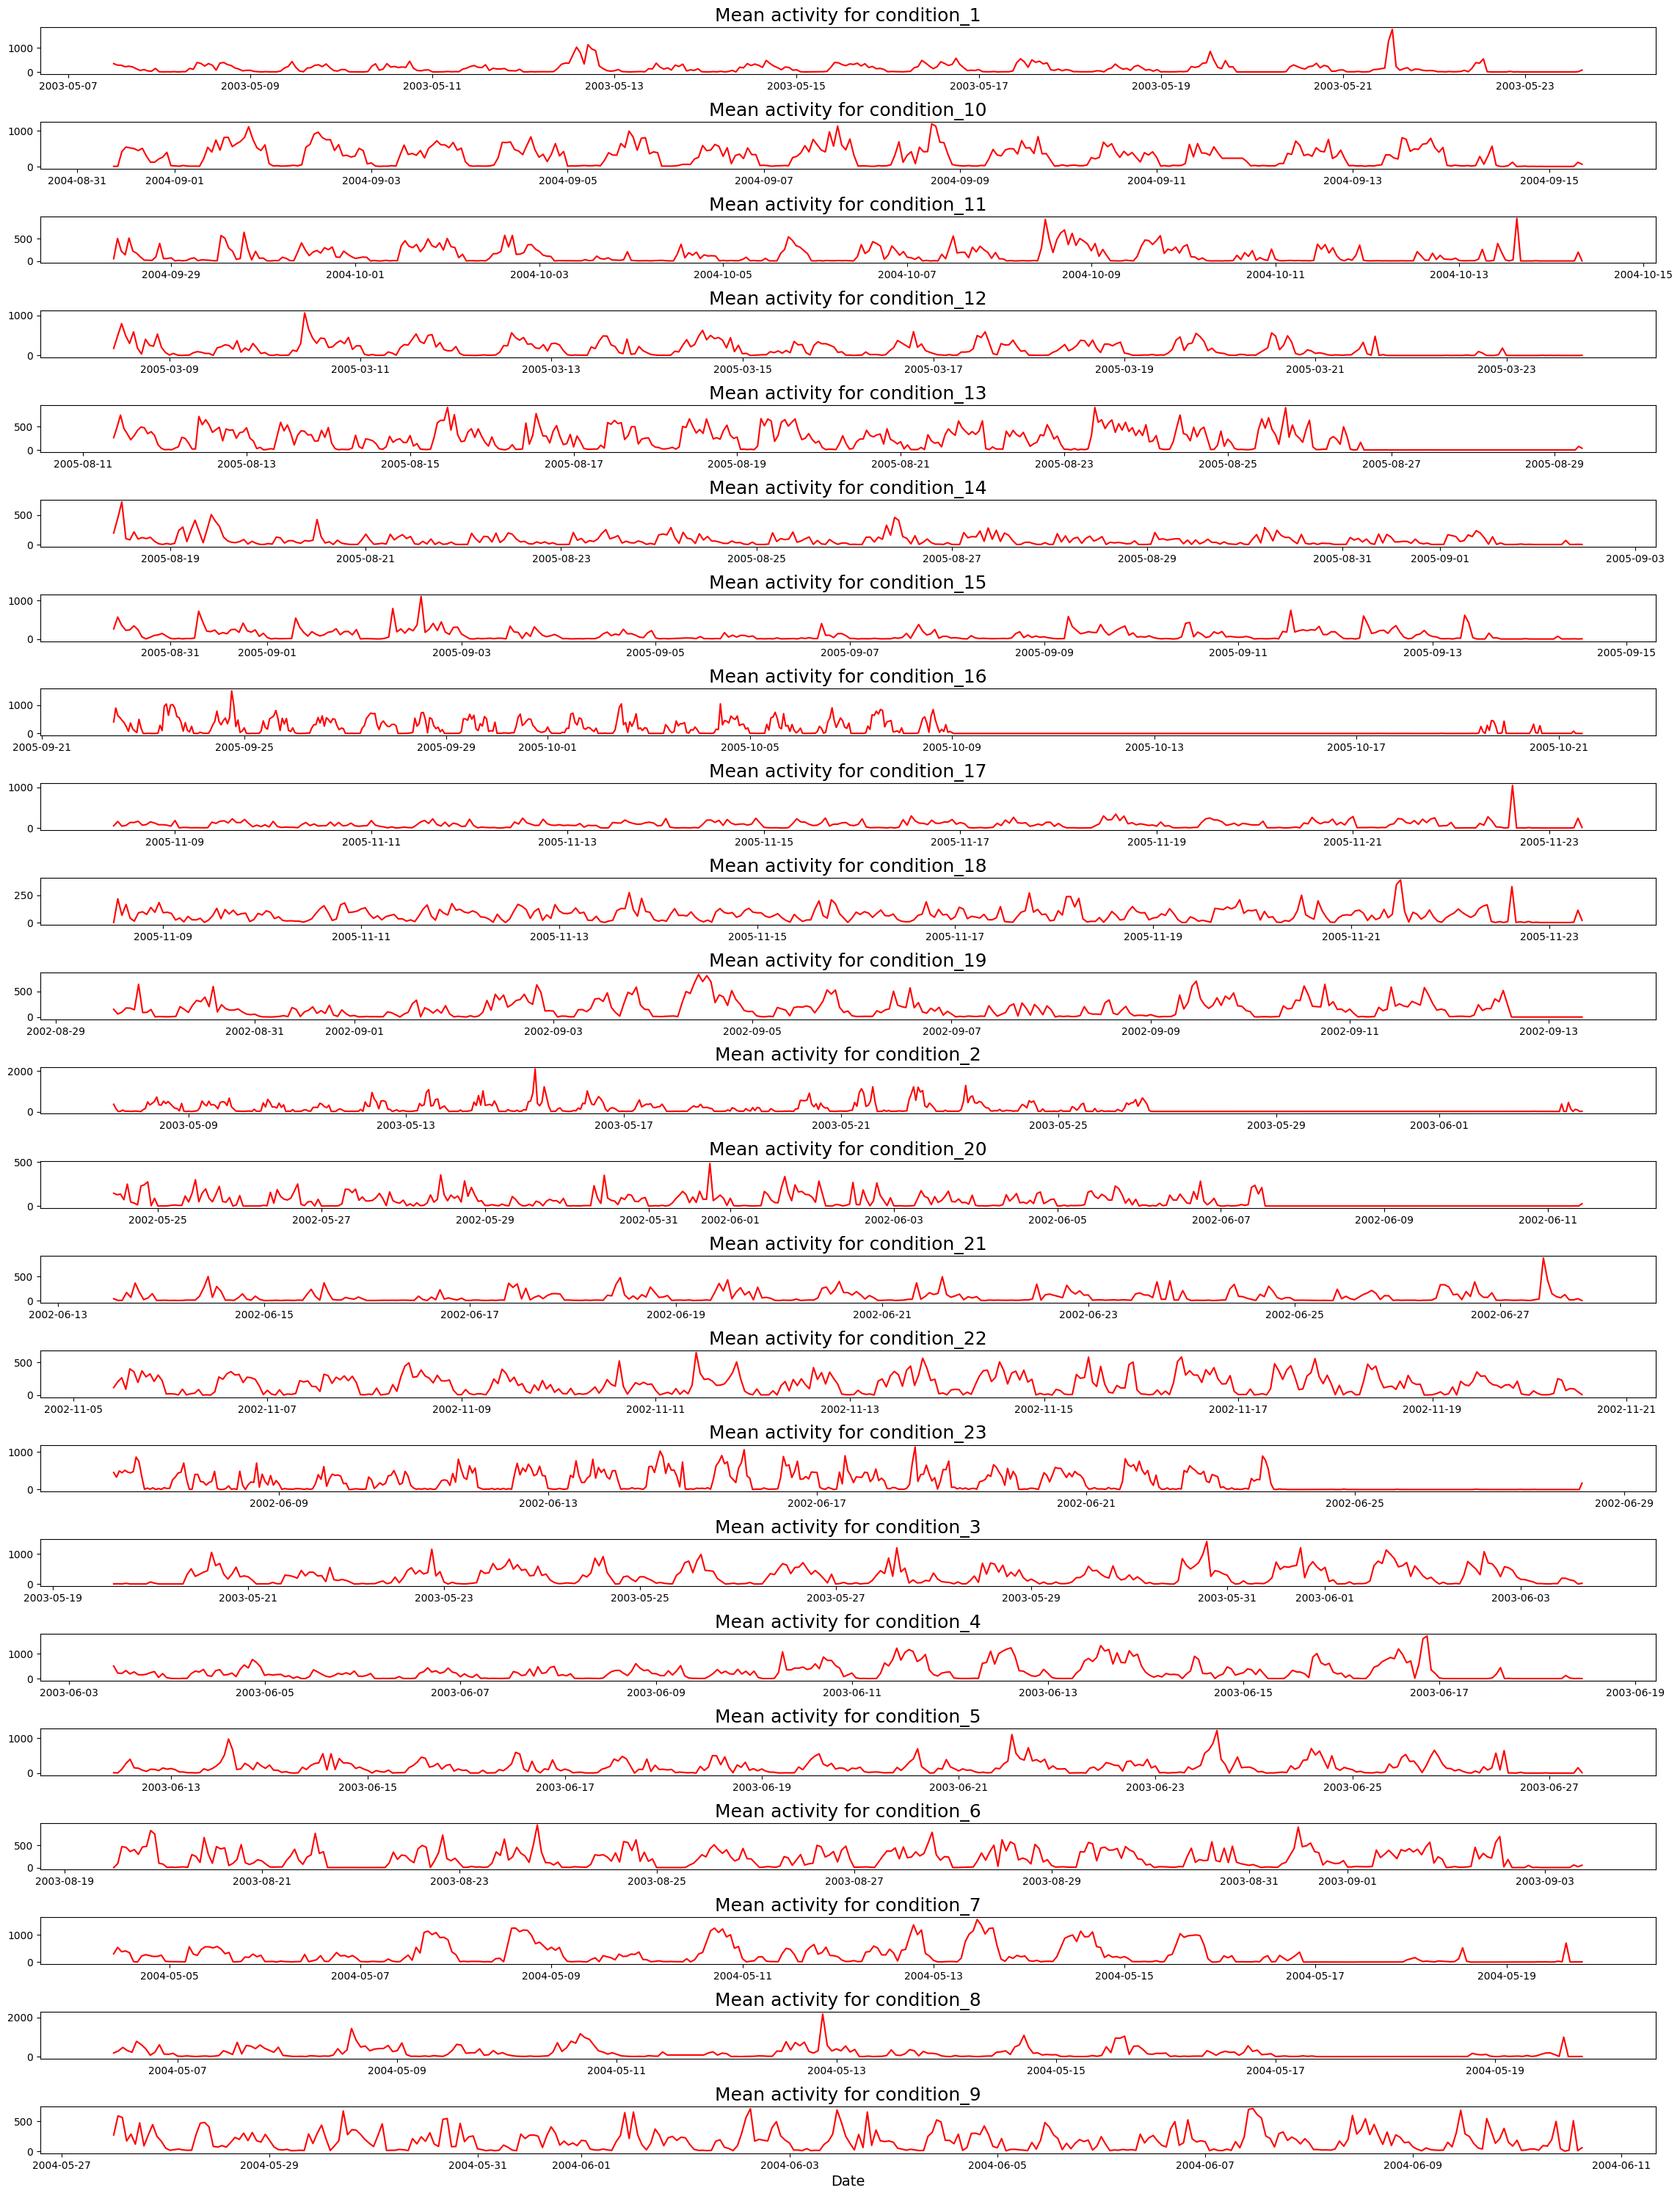

C:\Users\nothi\AppData\Local\Temp\ipykernel_11068\87801790.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[i].set_title(f'Mean activity for {control.source[1]}', fontsize=18)


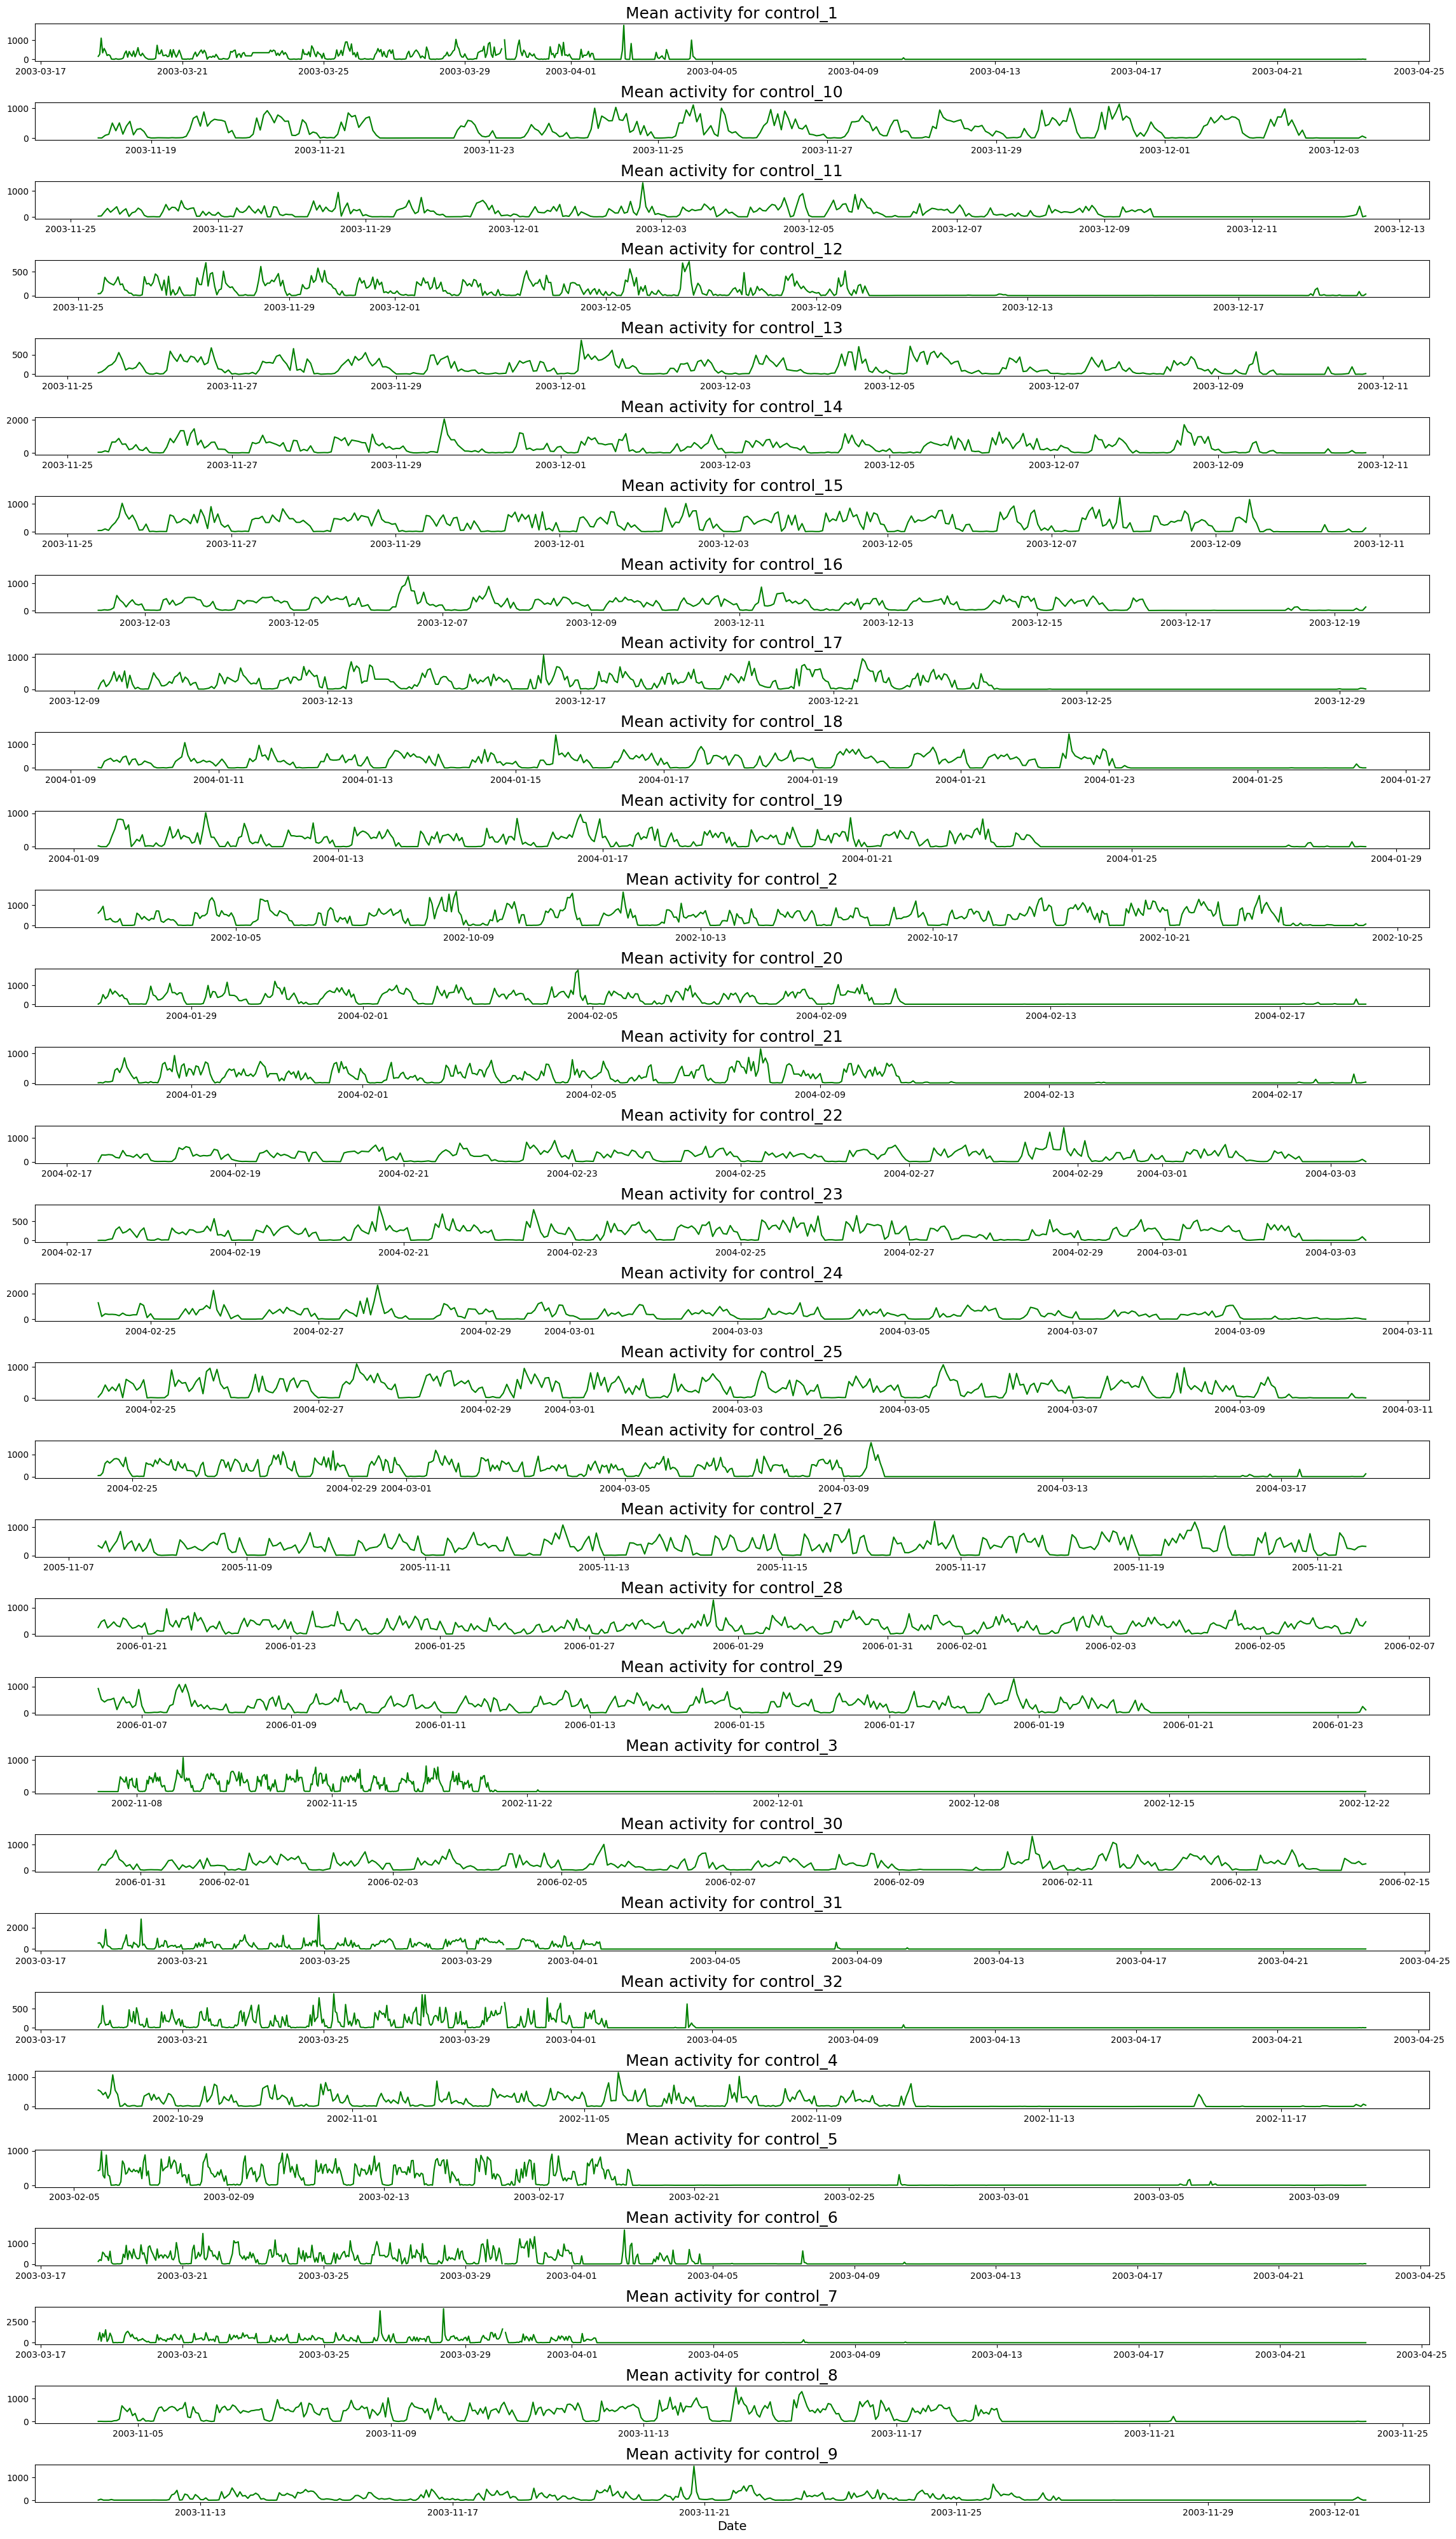

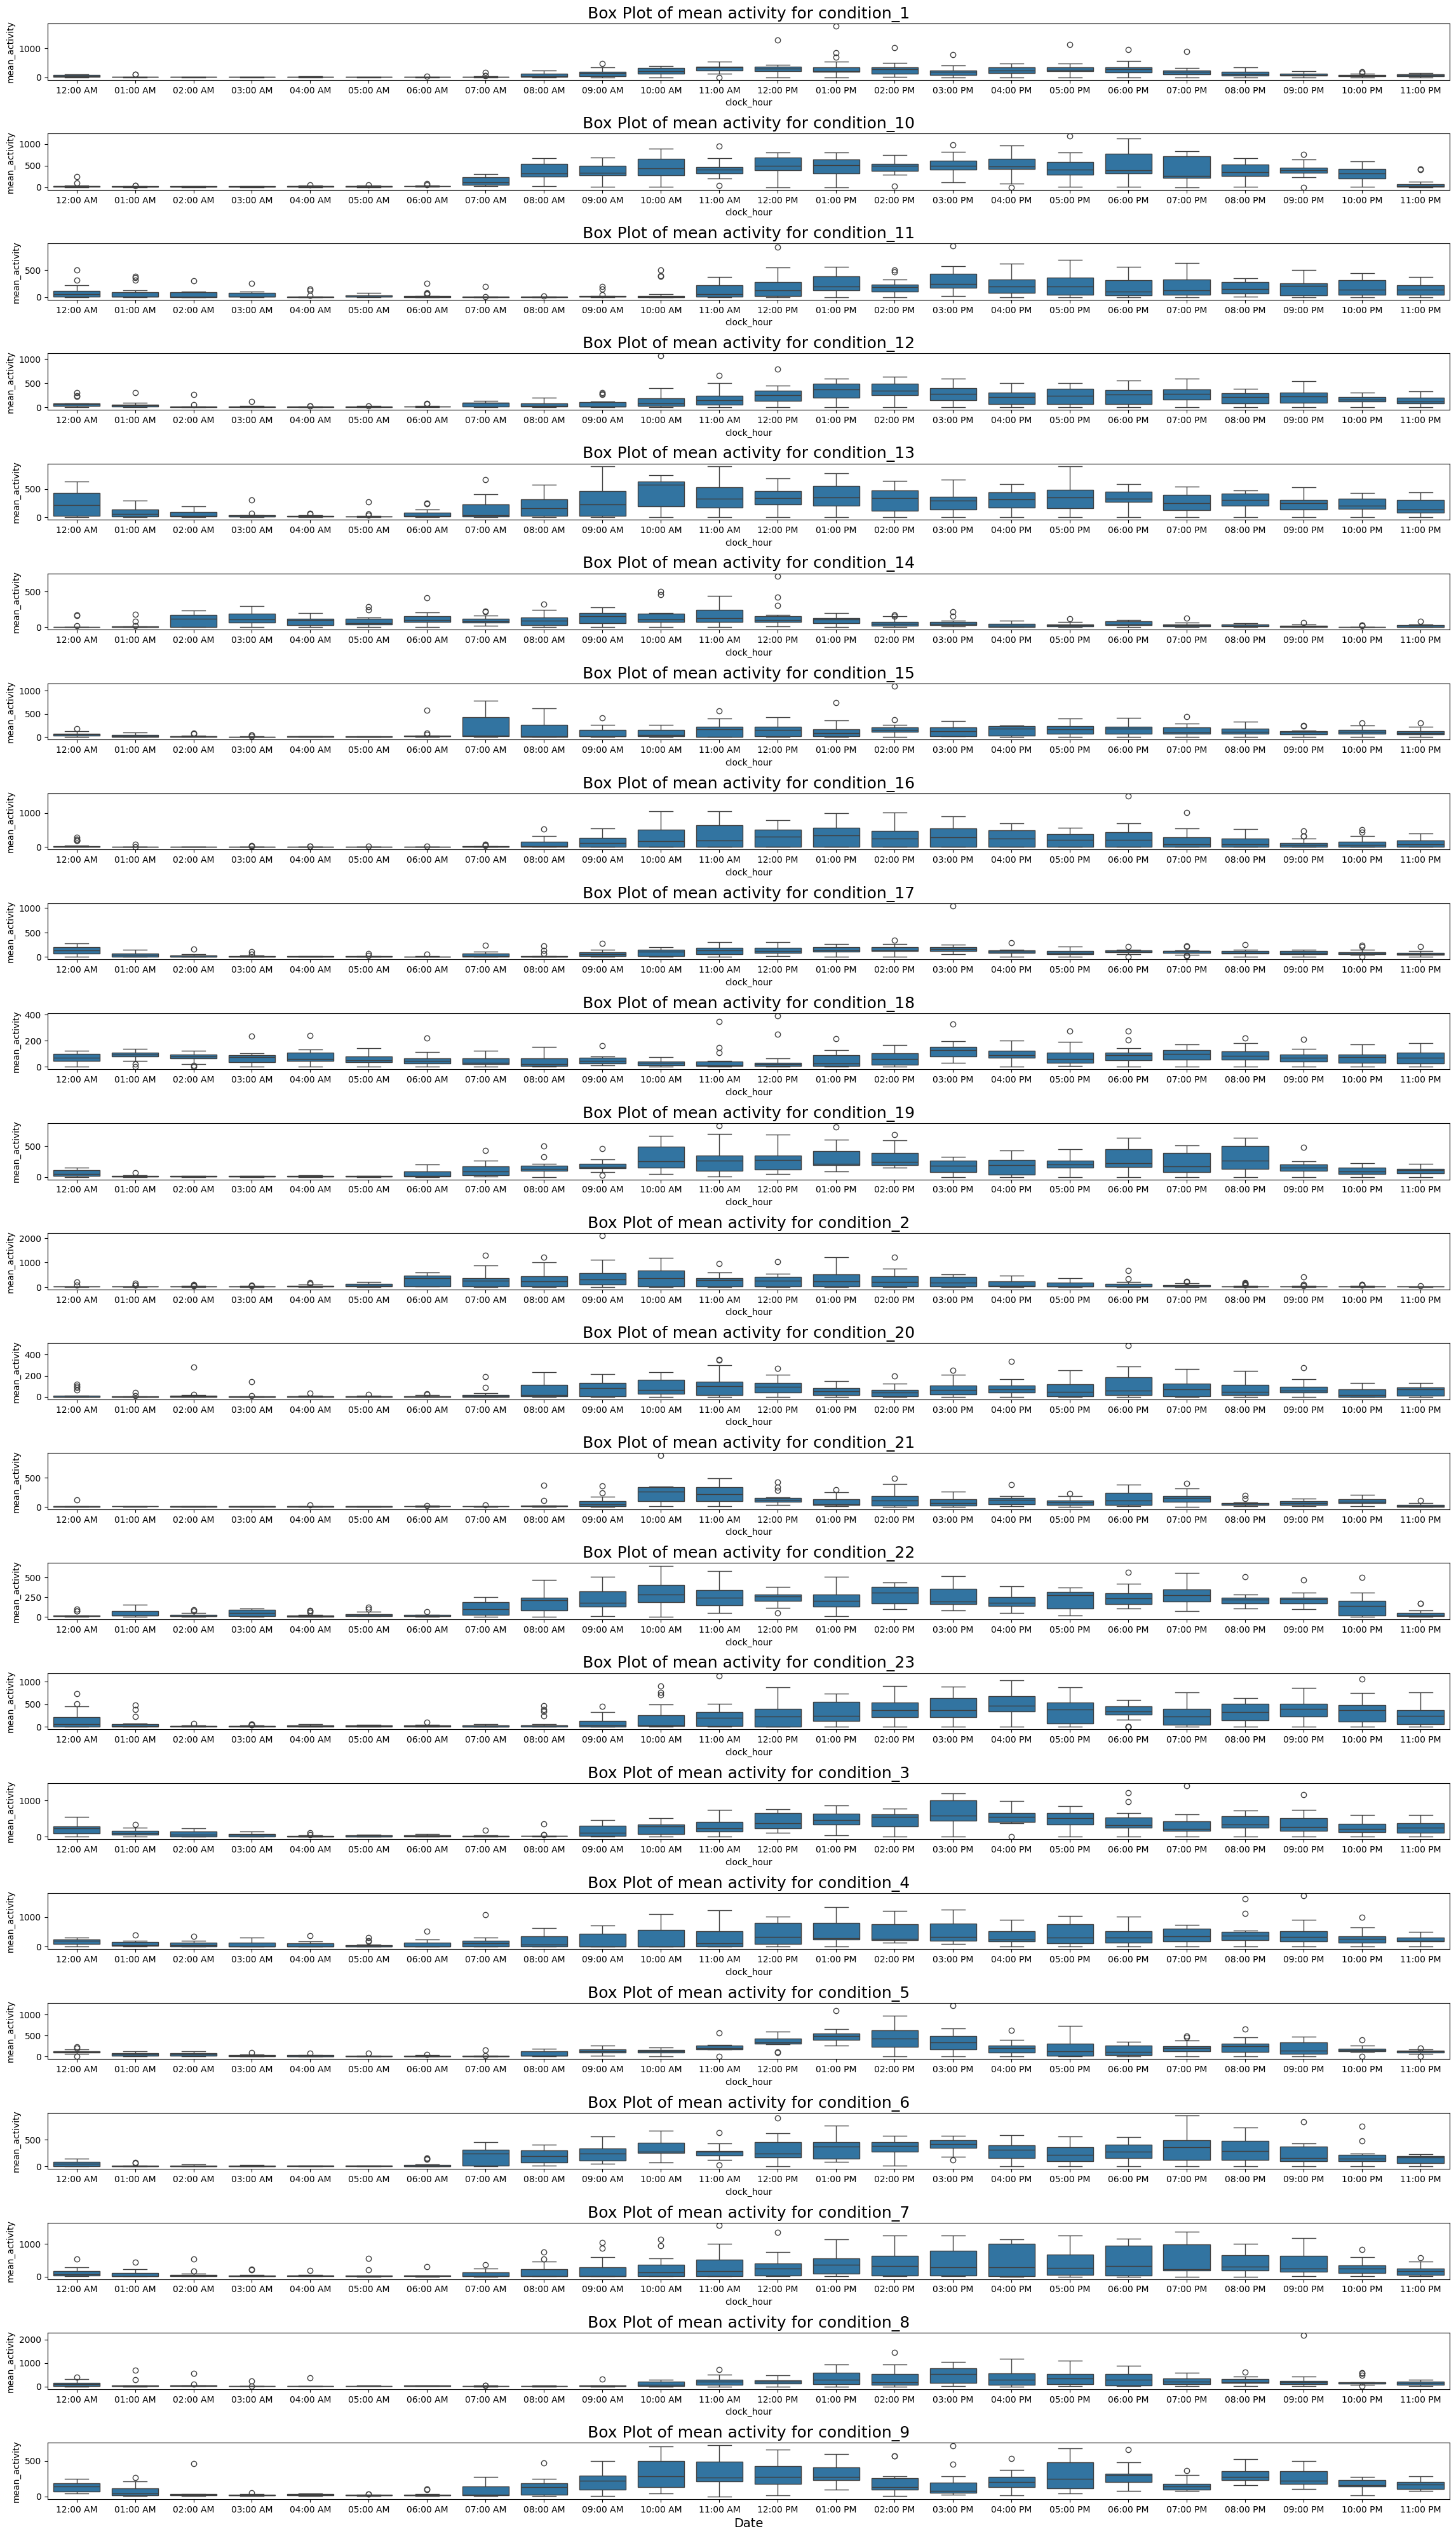

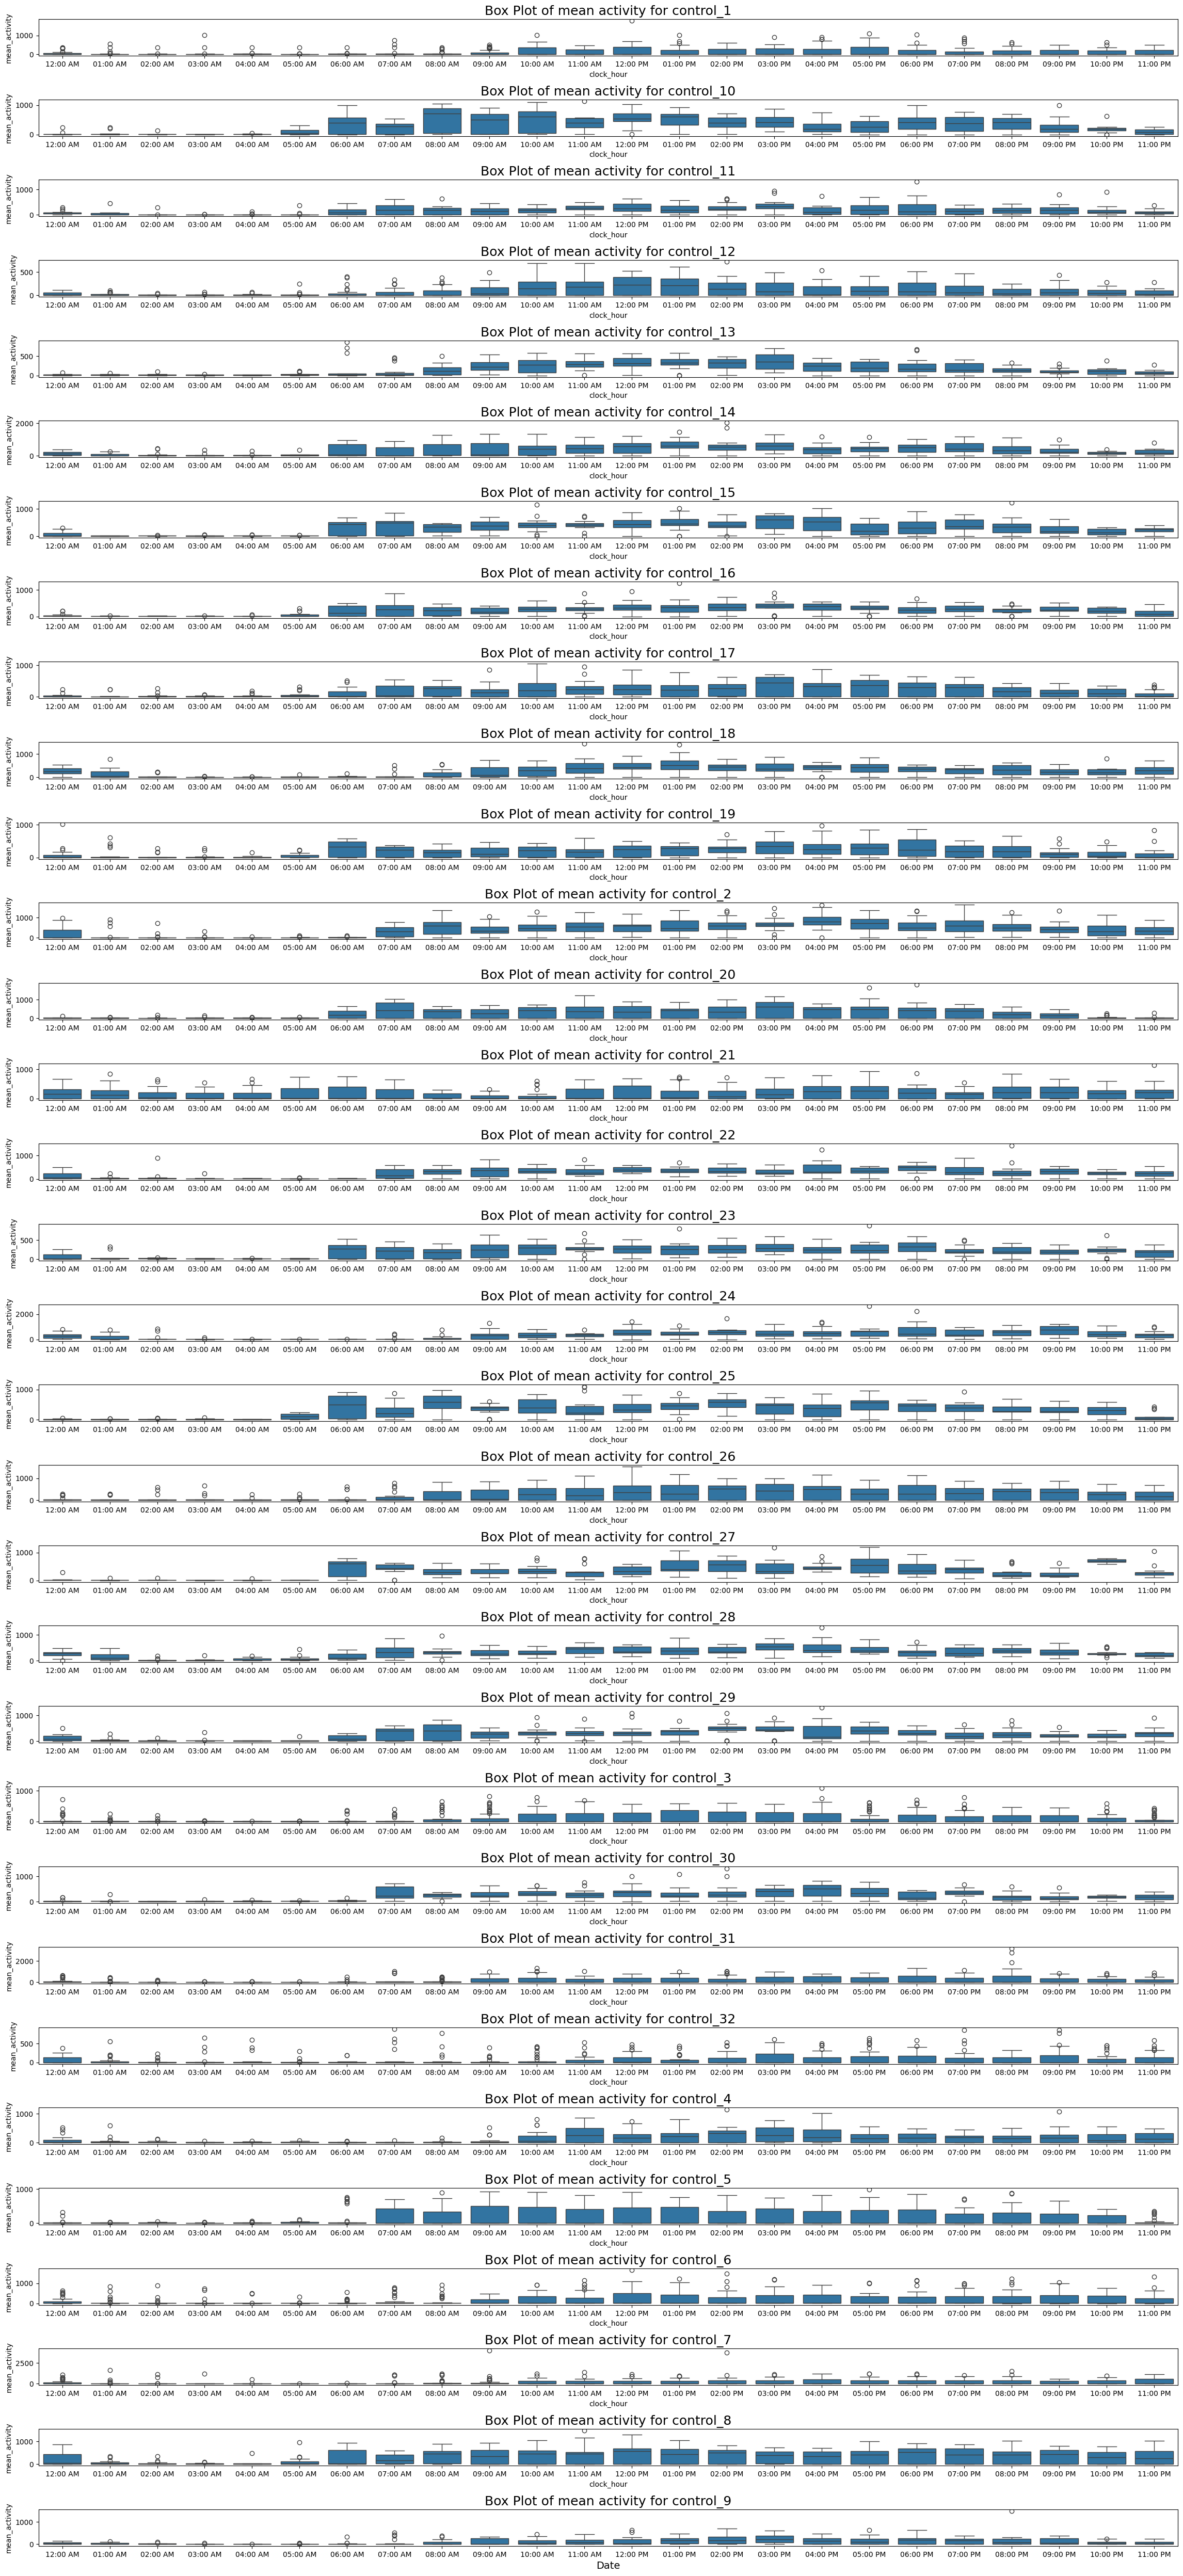

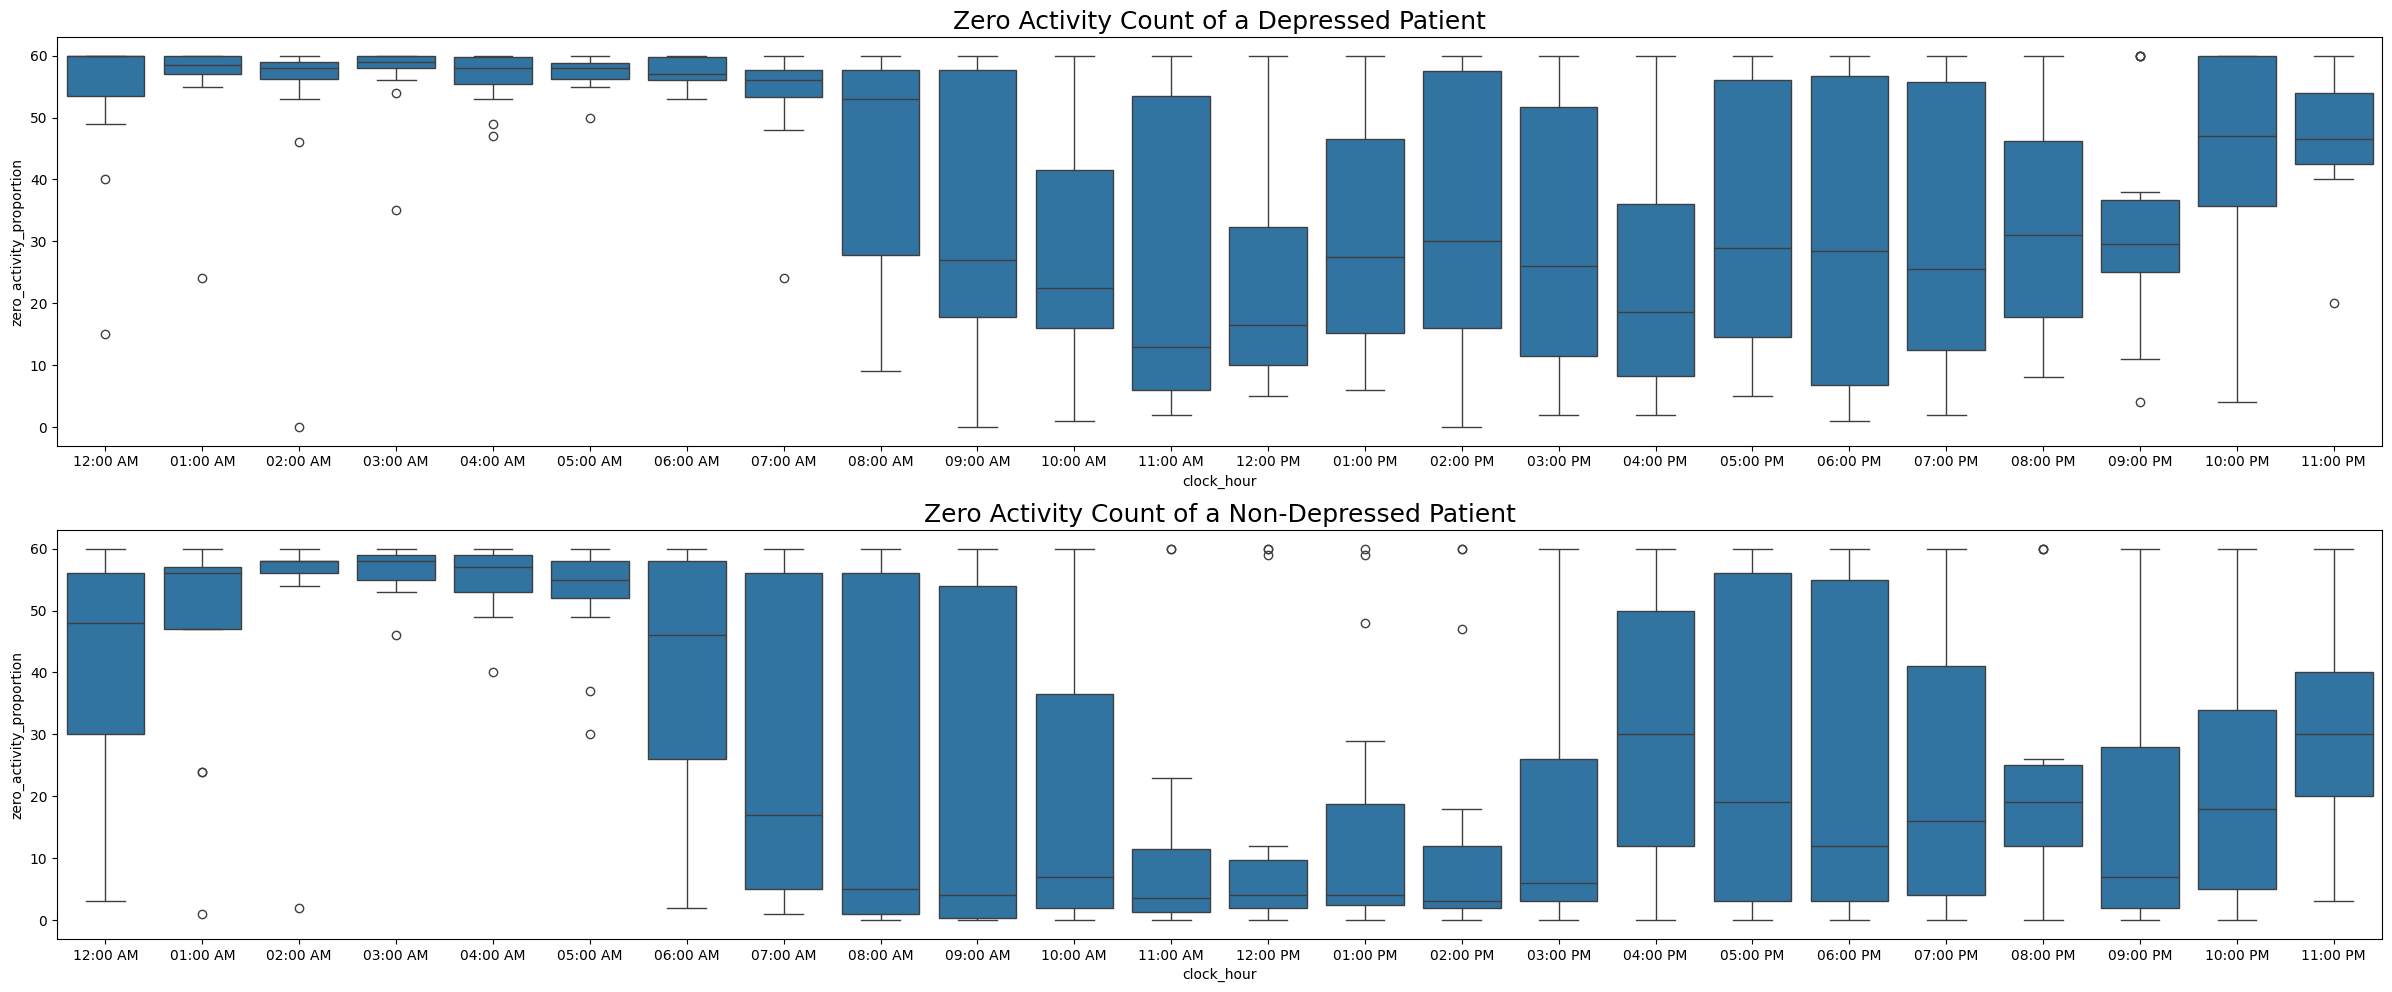

In [170]:
fig, axes = plt.subplots(23, 1, figsize=(23, 30))
cnt = 0
for i in range(23):
    condition = conditions[cnt]
    axes[i].plot(condition.index, condition.mean_activity, color='r')
    axes[i].set_title(f'Mean activity for {condition.source[1]}', fontsize=18)
    cnt += 1
    
plt.xlabel('Date', fontsize=14)
fig.tight_layout(pad=1.0)
fig.savefig('Mean activity of condition group.jpg', dpi=100)
plt.show()

fig, axes = plt.subplots(32, 1, figsize=(23, 40))
cnt = 0
for i in range(32):
    control = controls[cnt]
    axes[i].plot(control.index, control.mean_activity, color='g')
    axes[i].set_title(f'Mean activity for {control.source[1]}', fontsize=18)
    cnt += 1
    
plt.xlabel('Date', fontsize=14)
fig.tight_layout(pad=1.0)
fig.savefig('Mean activity of control group.jpg', dpi=100)
plt.show()

def to_clock(x):
    d = datetime.strptime(f'{x}:00', '%H:%M')
    return d.strftime('%I:%M %p')

# Draw Plot
fig, axes = plt.subplots(23, 1, figsize=(23, 40))

cnt = 0
for i in range(23):
    df = conditions[i].reset_index()

    # Prepare data
    df['hour'] = [d.hour for d in df.timestamp]
    df = df.sort_values('hour')
    df['clock_hour'] = df['hour'].apply(lambda x: to_clock(x))
    sns.boxplot(x='clock_hour', y='mean_activity', data=df, ax=axes[i])
    axes[i].set_title(f'Box Plot of mean activity for {df.source[1]}', fontsize=18)
    cnt += 1

plt.xlabel('Date', fontsize=14)
fig.tight_layout(pad=1.0)
plt.show()

# Draw Plot
fig, axes = plt.subplots(32, 1, figsize=(23, 50))

cnt = 0
for i in range(32):
    df = controls[i].reset_index()

    # Prepare data
    df['hour'] = [d.hour for d in df.timestamp]
    df = df.sort_values('hour')
    df['clock_hour'] = df['hour'].apply(lambda x: to_clock(x))
    sns.boxplot(x='clock_hour', y='mean_activity', data=df, ax=axes[i])
    axes[i].set_title(f'Box Plot of mean activity for {df.source[1]}', fontsize=18)
    cnt += 1

plt.xlabel('Date', fontsize=14)
fig.tight_layout(pad=1.0)
plt.show()

fig, axes = plt.subplots(2, 1, figsize=(24, 10))
df = conditions[12].reset_index()
df['hour'] = [d.hour for d in df.timestamp]
df = df.sort_values('hour')
df['clock_hour'] = df['hour'].apply(lambda x: to_clock(x))
sns.boxplot(x='clock_hour', y='zero_activity_proportion', data=df, ax=axes[0])
axes[0].set_title('Zero Activity Count of a Depressed Patient', fontsize=18)

df = controls[2].reset_index()
df['hour'] = [d.hour for d in df.timestamp]
df = df.sort_values('hour')
df['clock_hour'] = df['hour'].apply(lambda x: to_clock(x))
sns.boxplot(x='clock_hour', y='zero_activity_proportion', data=df, ax=axes[1])
axes[1].set_title('Zero Activity Count of a Non-Depressed Patient', fontsize=18)

fig.tight_layout(pad=1.0)
plt.show()

# Modeling

In [ ]:
def nextday(dates):
    for date in dates:
        yield date

def zero_proportion(series):
    total = len(series)
    return series.tolist().count(0) / total if total > 0 else 0

def extract_features(X, date):
    mask = X['date'] == date
    filtered_data = X[mask]['log_activity']
    return {
        'mean_log_activity': filtered_data.mean(),
        'std_log_activity': filtered_data.std(),
        'min_log_activity': filtered_data.min(),
        'max_log_activity': filtered_data.max(),
        'zero_proportion_activity': zero_proportion(filtered_data)
    }

class ExtractData(BaseEstimator, TransformerMixin):
    def __init__(self, path):
        self.path = path
        self.X = []

    def fit(self, X=None, y=None):
        return self

    def transform(self, X=None, y=None):
        self.X = []
        for filepath in sorted(os.listdir(self.path)):
            if filepath.endswith('.csv'):
                condition = filepath.split('.')[0]
                full_path = os.path.join(self.path, filepath)
                data = pd.read_csv(full_path)
                data['log_activity'] = np.log(data['activity'] + 1)
                dates = data['date'].unique()

                for date in nextday(dates):
                    features = extract_features(data, date)
                    features['source'] = condition
                    self.X.append(features)

        return pd.DataFrame(self.X)

    def fit_transform(self, X=None, y=None):
        self.fit(X, y)
        return self.transform(X, y)

def custom_train_test_split(train_set, test_set):
    X_train = train_set.drop('label', axis=1)
    y_train = train_set['label']
    X_test = test_set.drop('label', axis=1)
    y_test = test_set['label']
    return X_train, X_test, y_train, y_test

class CustomClassifierCV(BaseEstimator, TransformerMixin):
    def __init__(self, base_clf):
        self.base_clf = base_clf

    def fit(self, X, y=None):
        X = X.copy()
        X['label'] = y
        participants = X['source'].unique()
        folds = [X[X['source'] == p] for p in participants]

        predictions, actuals = [], []

        for i, test_set in enumerate(folds):
            train_set = pd.concat(folds[:i] + folds[i+1:])
            X_train, X_test, y_train, y_test = custom_train_test_split(
                train_set.drop(['source'], axis=1),
                test_set.drop(['source'], axis=1)
            )

            self.base_clf.fit(X_train, y_train)
            pred = self.predict(X_test)
            predictions.append(pred)
            actuals.append(y_test.iloc[0])

        self.score(predictions, actuals)

    def predict(self, X):
        predictions = self.base_clf.predict(X)
        return 1 if (predictions == 1).sum() > (predictions == 0).sum() else 0

    def score(self, predictions, actuals):
        print(classification_report(actuals, predictions))

# Processing data
e_conditions = ExtractData(path='condition/')
conditions = e_conditions.fit_transform(X=None)
conditions['state'] = 1

e_controls = ExtractData(path='control/')
controls = e_controls.fit_transform(X=None)
controls['state'] = 0

# Combine and shuffle data
full_df = pd.concat([controls, conditions], ignore_index=True).sample(frac=1)

# Prepare for training
X = full_df.drop(['state'], axis=1)
y = full_df['state']

# Train the classifier
forest = RandomForestClassifier(n_estimators=100)
custom_clfCV = CustomClassifierCV(forest)
custom_clfCV.fit(X, y)
